In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Figure out which features affect the survival rates**

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**1- Extract the basic info of the dataframe including number of rows, columns, type of data in each column.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2- Check for the null values and duplicates.**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.notna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**3- Drop the duplicates and check for the missing values again.**

In [ ]:
df=df.drop_duplicates()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.notna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**4- Check and see whether there is a correlation between age and fare. You can use seaborn for visualization**

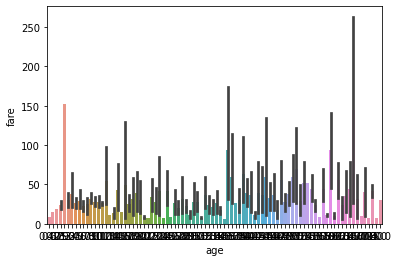

In [ ]:
sns.barplot(data=df, x="age", y="fare")


**5- Check for the average age of man, woman and child. Impute the missing values with these averages.**

In [ ]:
df.groupby('who').mean()

,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,
child,2.621951,6.438049,1.731707,1.268293,32.950765,0.0,0.073171
man,2.292683,33.713351,0.290466,0.166297,27.311797,1.0,0.733925
woman,2.031873,31.985981,0.545817,0.585657,48.583350,0.0,0.434263


**6- Change the survived from integer to category.**

In [ ]:
df['survived'] = pd.Categorical(df.survived)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    category
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(3), object(5)
memory usage: 91.8+ KB


**7-Use side-by-side barplots (and other plots generated by seaborn) to see how different features might affect survival**

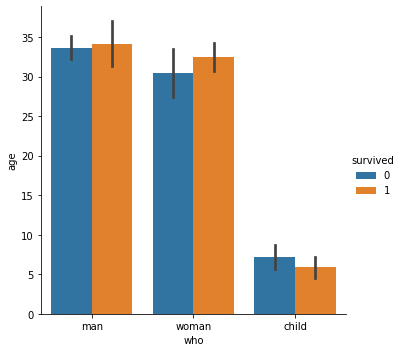

In [ ]:
sns.catplot(x = 'who', y='age', 
            hue = 'survived',data=df, 
            kind='bar')

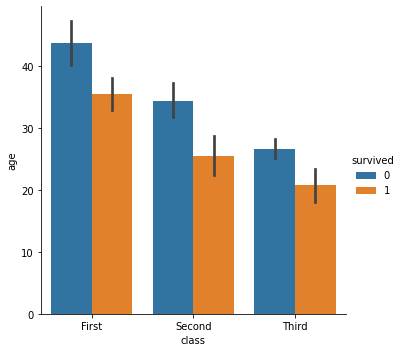

In [ ]:
sns.catplot(x = 'class', y='age', 
            hue = 'survived',data=df, 
            kind='bar')